## Credit card fraud detection
Real-life classification problems consist of many cases in which the data is not "beautifully" balanced. In such cases, one may find the accuracy score of over 90%, but that may not be the happy ending. This is because we often want to focus only on the minority class, as it plays more important role in such problems. In order to tackle this, we need to come up with proper evaluation metrics and resampling techniques. One of the popular problem regarding imbalanced dataset is Credit Card Fraud Detection. Throughout this problem, we can illustrate well what we need to handle such an imbalanced dataset.



**Understanding the dataset:**
- Class: 0 - non-fraud, 1 - fraud
- Amount: Transaction's amount
- V1,V2...V28: These are anonymous features, due to confidentiality. Additionally, these are numerical values which are results of PCA transformation.
- Time: The amount of seconds elapsed between each transaction and the first transaction in the dataset.

## Data analysis

In [1]:
import sys

sys.path

sys.executable


'/home/khanh/miniconda3/envs/flask/bin/python'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import warnings

warnings.filterwarnings('ignore')

In [3]:
path = pathlib.Path('/home/khanh/Coderschool/Week 5/creditcardfraud/creditcard.csv')
print(path)
data = pd.read_csv(path)

/home/khanh/Coderschool/Week 5/creditcardfraud/creditcard.csv


In [4]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Explore Data Analysis
Visualization & Preprocessing

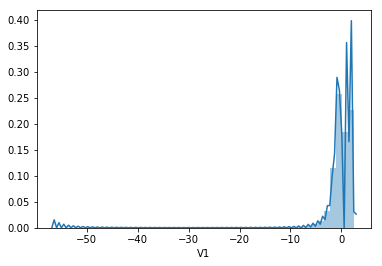

In [8]:
sns.distplot(data['V1'])

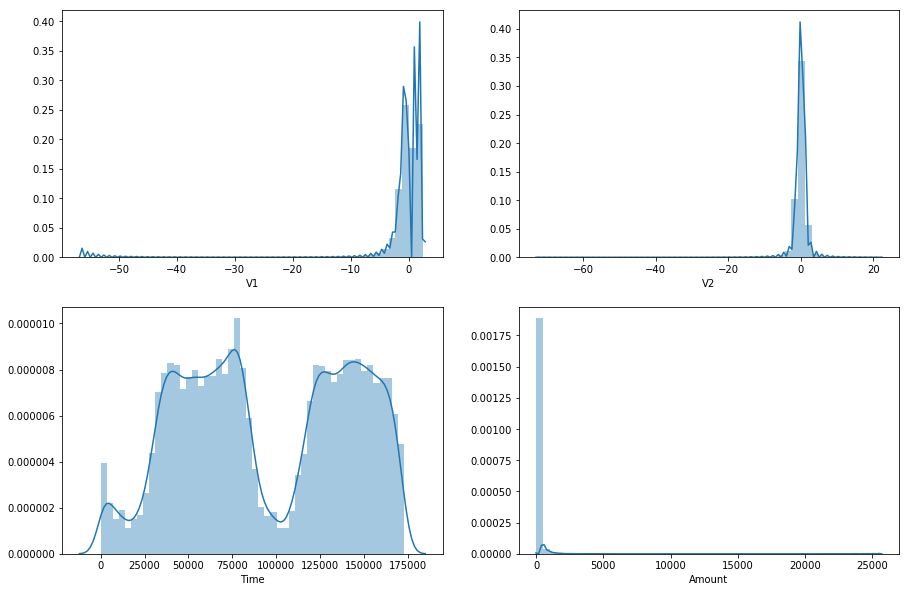

In [9]:
plt.figure(figsize=(15,10))
plot = ['V1', 'V2', 'Time', 'Amount']
for i in range(1,5):
    plt.subplot(2,2,i)
    sns.distplot(data[plot[i-1]])
plt.show()

Here we still have two predictors Amount and Time that has not been scaled yet. So we need to normalize these features also. Using sklearn.preprocessing.StandardScaler for this task

In [10]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
amount = data['Amount'].values.reshape(-1,1)
data['Amount']  = std_scaler.fit_transform(amount)
time = data['Time'].values.reshape(-1,1)
data['Time']  = std_scaler.fit_transform(time)

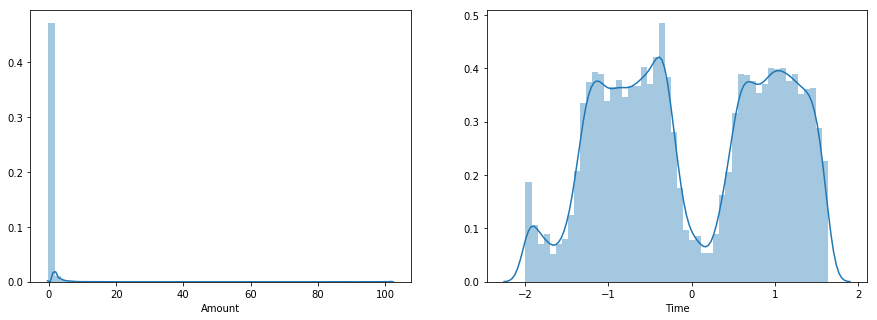

In [11]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.distplot(data['Amount'])
plt.subplot(1,2,2)
sns.distplot(data['Time'])
plt.show()

**Plotting target classes**
- In order to check how skewed our data is, let's check for the percentage of each class:

0: No Fraud

1: Fraud

In [12]:
a = data.groupby('Class').count()
nfraud = a.loc[0].values[0]
fraud = a.loc[1].values[0]

In [13]:
# Check ratio between classes
percentage_fraud = (fraud / (nfraud+fraud)) * 100
percentage_no_fraud = (nfraud / (nfraud+fraud)) * 100

print ('Percentage Fraud transactions: ', percentage_fraud)
print ('Percentage No-fraud transactions: ', percentage_no_fraud)

Percentage Fraud transactions:  0.1727485630620034
Percentage No-fraud transactions:  99.82725143693798


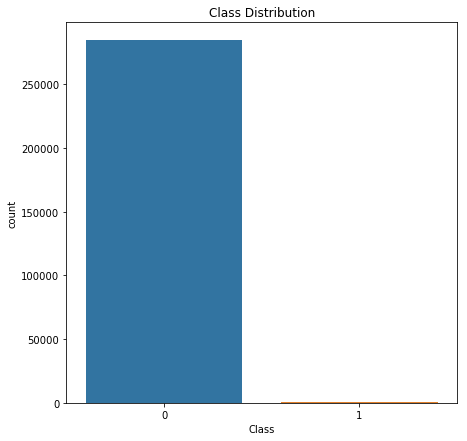

In [14]:
fig = plt.figure(figsize=(7,7)) # Set figsize
sns.countplot(data['Class'])
plt.title('Class Distribution')
plt.show()

**Approaches to handle imbalanced data**
Refs: https://www.analyticsvidhya.com/blog/2017/03/imbalanced-classification-problem/

Dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data (data resampling) before providing the data as input to the machine learning algorithm. The later technique is preferred as it has wider application.

Data-level techniques (Data resampling):
Refs:

https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
https://beckernick.github.io/oversampling-modeling/
Despite the advantage of balancing classes, these techniques also have their weaknesses. The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. Whereas in under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information. alt text

Random over-sampling
Random under-sampling
SMOTE (Synthetic Minority Over-sampling Technique)
...
Algorithm-level techniques:
Algorithmic ensemble techniques
Bagging-based
Boosting-based
Adaptive Boosting - Ada Boost
Gradient Tree Boosting
XG Boost
...
Improving classification algorithm
Using built-in class_weight option from sklearn models:
Logistic regresion
SVM
...

In [15]:
lst = []
y = data['Class']
for col in data.columns:
    lst.append(col)
lst.remove('Class')

X = data[lst]
print(X.shape, y.shape)

(284807, 30) (284807,)


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("Number transactions training dataset: ", len(X_train))
print("Number transactions testing dataset: ", len(X_test))
print("Total number of transactions: ", len(X))

Number transactions training dataset:  199364
Number transactions testing dataset:  85443
Total number of transactions:  284807


As the total number of transactions is too large, which may damage your computer. We obtain the smaller training dataset with the same ratio of classes of original training dataset.



In [17]:
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['Class'].value_counts()

0    199038
1       326
Name: Class, dtype: int64

Percentage of normal transactions:  Your code here
Percentage of fraud transactions:  Your code here
Total number of transactions in resampled data:  Your code here


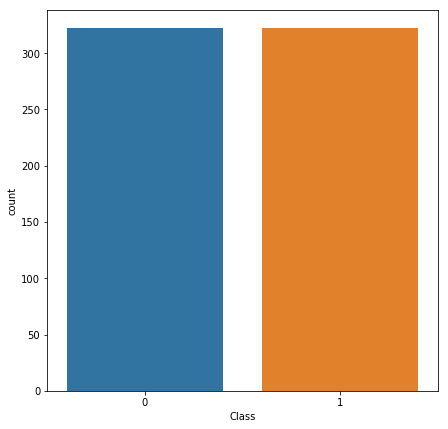

In [18]:
# Fraud/non-fraud data
# Select row which "Class" is 1 and save in fraud_data
fraud_data = data[data['Class'] == 1]
# Select row which "Class" is 0 and save in non_fraud_data
non_fraud_data = data[data['Class'] == 0]

# Number of fraud, non-fraud transactions
number_records_fraud = 322
number_records_non_fraud = 322

# Using sample function on data frame to randomly select number_records_fraud from non_fraud_data data frame
under_sample_non_fraud = fraud_data.tail(number_records_fraud)
under_sample_fraud = non_fraud_data.tail(number_records_fraud)

# **concat** under_sample_non_fraud and fraud_data to form under_sample_data
under_sample_data = pd.concat([under_sample_non_fraud, under_sample_fraud], axis=0)

# Showing ratio
print("Percentage of normal transactions: ", "Your code here")
print("Percentage of fraud transactions: ", "Your code here")
print("Total number of transactions in resampled data: ", "Your code here")

# Assigning X,y for Under-sampled Data
X_train_undersample = under_sample_data[lst]
y_train_undersample = under_sample_data['Class']

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
sns.countplot(under_sample_data['Class'])
plt.show()

Percentage of normal transactions:  94771
Percentage of fraud transactions:  94771
Total number of transactions in resampled data:  189542


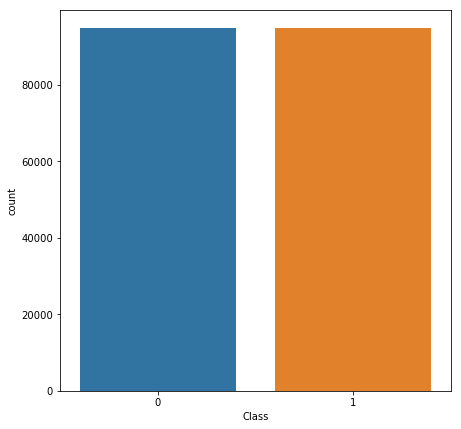

In [61]:
# Fraud/non-fraud data
# Select row which "Class" is 1 and save in fraud_data
fraud_data = data[data['Class'] == 1]
# Select row which "Class" is 0 and save in non_fraud_data
non_fraud_data = data[data['Class'] == 0]

# Number of fraud, non-fraud transactions
number_records_non_fraud = nfraud //3

# Using sample function on data frame to randomly select number_records_fraud from non_fraud_data data frame
over_sample_non_fraud = non_fraud_data.head(number_records_non_fraud)
over_sample_fraud = fraud_data.sample(number_records_non_fraud, replace=True)

# **concat** under_sample_non_fraud and fraud_data to form under_sample_data
over_sample_data = pd.concat([under_sample_non_fraud, under_sample_fraud], axis=0)

# Showing ratio
print("Percentage of normal transactions: ", f'{number_records_non_fraud}')
print("Percentage of fraud transactions: ", f'{number_records_non_fraud}')
print("Total number of transactions in resampled data: ", f'{number_records_non_fraud*2}')

# Assigning X,y for Under-sampled Data
X_train_oversample = over_sample_data[lst]
y_train_oversample = over_sample_data['Class']

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
sns.countplot(over_sample_data['Class'])
plt.show()

## Modeling

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [45]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()

models = [lr, dtc, rfc]
models_name = ['Logistic', 'Decision', 'Random']

In [58]:
X_train.count(0).values[0]

199364

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

def evaluate_model(estimator, X, y):
    print('Confusion matrix:\n', confusion_matrix(y, estimator.predict(X)))
    print('Classification report:\n', classification_report(y, estimator.predict(X)))
    print('Testing set information:\n', X.count(0).values[0], X.count(1).values[0])

    np.set_printoptions(precision=2)

## Run model with original data

In [60]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train, y_train)
    result = evaluate_model(model, X_test, y_test)
    print(result)

Model: Logistic
Confusion matrix:
 [[85263    14]
 [   77    89]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85277
           1       0.86      0.54      0.66       166

    accuracy                           1.00     85443
   macro avg       0.93      0.77      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 85443 30
None
Model: Decision
Confusion matrix:
 [[85245    32]
 [   43   123]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85277
           1       0.79      0.74      0.77       166

    accuracy                           1.00     85443
   macro avg       0.90      0.87      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Testing set information:
 85443 30
None
Model: Random
Confusion matrix:
 [[85273     4]
 [   40   126]]
Classification report:

## Run model with undersample data

In [62]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train_undersample, y_train_undersample)
    result = evaluate_model(model, X_test, y_test)
    print(result)

Model: Logistic
Confusion matrix:
 [[44893 40384]
 [   12   154]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69     85277
           1       0.00      0.93      0.01       166

    accuracy                           0.53     85443
   macro avg       0.50      0.73      0.35     85443
weighted avg       1.00      0.53      0.69     85443

Testing set information:
 85443 30
None
Model: Decision
Confusion matrix:
 [[30026 55251]
 [    0   166]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.35      0.52     85277
           1       0.00      1.00      0.01       166

    accuracy                           0.35     85443
   macro avg       0.50      0.68      0.26     85443
weighted avg       1.00      0.35      0.52     85443

Testing set information:
 85443 30
None
Model: Random
Confusion matrix:
 [[29907 55370]
 [    0   166]]
Classification report:

## Run model with oversample data

In [63]:
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    model.fit(X_train_oversample, y_train_oversample)
    result = evaluate_model(model, X_test, y_test)
    print(result)

Model: Logistic
Confusion matrix:
 [[44893 40384]
 [   12   154]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.53      0.69     85277
           1       0.00      0.93      0.01       166

    accuracy                           0.53     85443
   macro avg       0.50      0.73      0.35     85443
weighted avg       1.00      0.53      0.69     85443

Testing set information:
 85443 30
None
Model: Decision
Confusion matrix:
 [[30095 55182]
 [    0   166]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.35      0.52     85277
           1       0.00      1.00      0.01       166

    accuracy                           0.35     85443
   macro avg       0.50      0.68      0.26     85443
weighted avg       1.00      0.35      0.52     85443

Testing set information:
 85443 30
None
Model: Random
Confusion matrix:
 [[29388 55889]
 [    0   166]]
Classification report: